<a href="https://colab.research.google.com/github/LeticiaGDornelas/Projetos_DNC/blob/main/Desafio4_Let%C3%ADciaGDornelas_Escola_DNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Desafio 4: Análise de dados com Python**

## **ENTENDIMENTO DO NEGÓCIO**

**Contexto:** Uma empresa está investindo mensalmente em plataformas de publicidade online, como Youtube, Facebook e newspaper, para a prospecção de leads (pessoas interessadas em seus produtos). A fim de acompanhar o desempenho desses investimentos, a empresa registra todos os gastos com publicidade e todos os retornos de vendas gerados a partir desses investimentos.

**Objetivo:** Para entender melhor a relação entre as variáveis presentes nesses registros e identificar os fatores que mais impactam na geração de leads, a empresa solicitou a análise de um especialista em dados. Além disso, a empresa busca criar um modelo de predição de valores para estimar o retorno de vendas que pode ser gerado a partir de um determinado investimento em publicidade.

## **ETAPA 1 - ANÁLISE DESCRITIVA**: Entendimento dos dados

In [ ]:
#Importando a biblioteca pandas para manipulação dos dados.
import pandas as pd

#Importando a base de dados.
df = pd.read_csv('/content/MKT.csv')

In [ ]:
#Primeiros registros.
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
#Últimos registros.
df.tail()

,youtube,facebook,newspaper,sales
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60
170,278.52,10.32,10.44,16.08


In [ ]:
#Distribuição de dados.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
#Tipo de variável em cada dado.
df.dtypes

,0
youtube,float64
facebook,float64
newspaper,float64
sales,float64


In [ ]:
#Resumo dos valores estatísticos.
round(df.describe(), 2)

,youtube,facebook,newspaper,sales
count,171.00,171.00,171.00,171.00
mean,178.02,27.67,35.24,16.92
std,102.45,17.91,24.90,6.31
min,0.84,0.00,0.36,1.92
25%,91.08,11.70,13.74,12.54
50%,179.76,26.76,31.08,15.48
75%,262.98,43.68,50.88,20.82
max,355.68,59.52,121.08,32.40


In [ ]:
#Verificação de dados nulos.
df.isnull().sum()

,0
youtube,0
facebook,0
newspaper,0
sales,0


In [ ]:
# Retornando o total de cada coluna.
dados_total = pd.DataFrame({'Tipo': df.columns, 'Total': df.sum()})
dados_total.reset_index(inplace=True)
dados_total = dados_total[['Tipo', 'Total']]
dados_total

,Tipo,Total
0,youtube,30441.60
1,facebook,4731.84
2,newspaper,6026.04
3,sales,2893.80


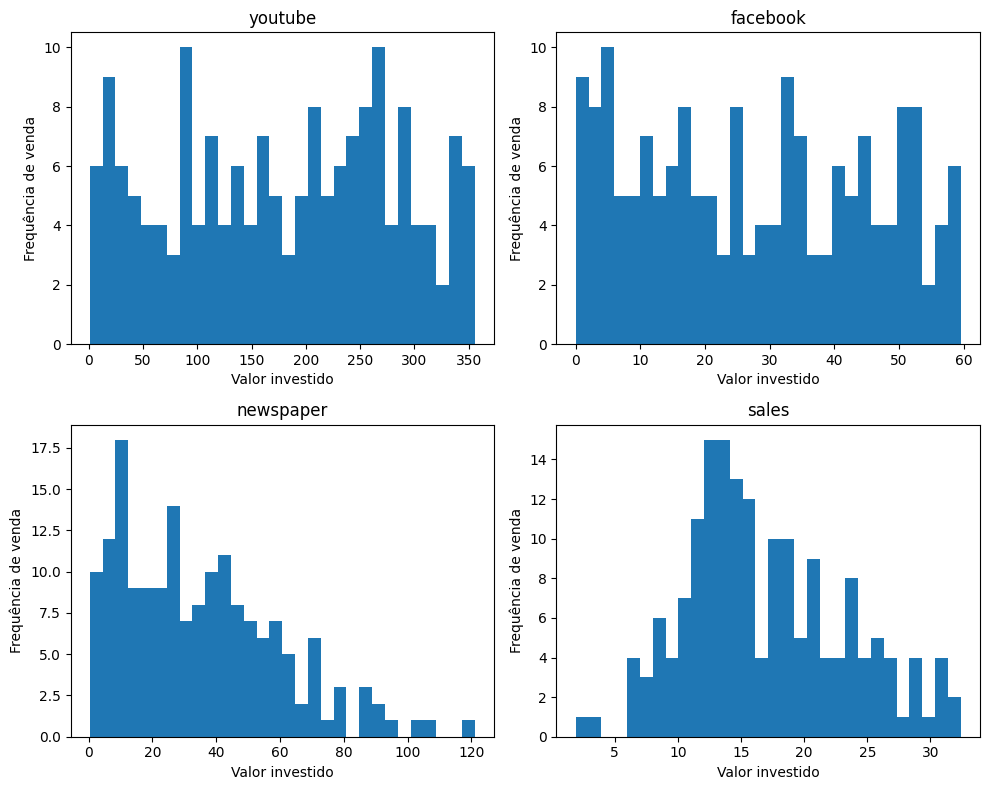

In [ ]:
import matplotlib.pyplot as plt

# Criar histogramas para cada coluna numérica
axes = df.hist(figsize=(10, 8), bins=30, grid=False)

# Iterar sobre cada subplot (cada gráfico individual)
for ax in axes.flatten():
    # Definir o título para o eixo X
    ax.set_xlabel('Valor investido', fontsize=10)
    # Definir o título para o eixo Y
    ax.set_ylabel('Frequência de venda', fontsize=10)

# Mostrar todos os gráficos
plt.tight_layout()  # Ajusta o layout para evitar sobreposições
plt.show()

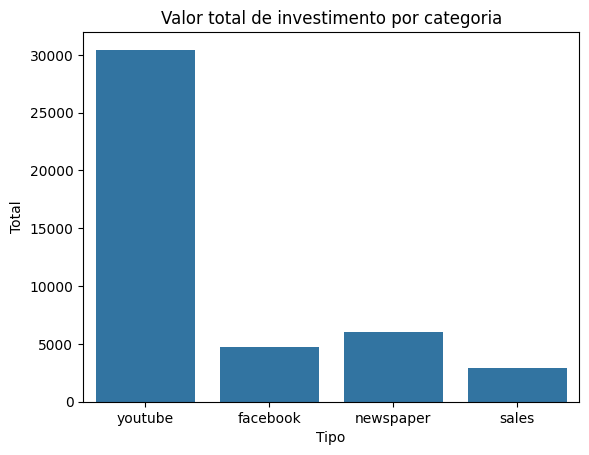

In [ ]:
# Montando o gráfico do total de cada coluna.
import seaborn as sns
sns.barplot(data=dados_total, x='Tipo', y='Total');
plt.title("Valor total de investimento por categoria");

 **Interpretação dos resultados da análise descritiva**

É possível perceber que há inconsistências nos dados analisados:
1.	A média dos valores da coluna "youtube" é maior do que a soma das médias das outras colunas.
2.	O desvio padrão da coluna "youtube" está acima de 100, o que representa uma variação de valores muito grande para investimentos em marketing, sendo este desvio muito mais congruente com a coluna "sales".

Com base nesse problema, temos a seguinte premissa:

Em algum momento durante a exportação dos dados, os valores foram deslocados uma coluna à direita ou somente o nome das colunas que foi deslocado à esquerda. Assim. Os valores de “sales” passaram a ser da coluna de “youtube”.

Como forma de correção, o ideal é deslocar o nome das colunas uma coluna à direita.


# **ETAPA 2 - ANÁLISE EXPLORATÓRIA**: Preparação dos dados

Para esta seção, mudaremos os nomes das colunas a fim de solucionar o problema identificado na primeira etapa. Os dados restantes serão mantidos visto que não foi encontrada outra inconsistência.

In [ ]:
df = pd.read_csv('/content/MKT.csv')
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
# Renomeando as colunas do dataframe original.
df_alt = df.rename(columns={'youtube': 'sales', 'facebook': 'youtube', 'newspaper': 'facebook', 'sales': 'newspaper'})
df_alt.head()

,sales,youtube,facebook,newspaper
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
#Adicionando duas colunas: investimento e ROI
df_alt['investimento'] = df_alt['youtube'] + df_alt['facebook'] + df_alt['newspaper']
df_alt['ROI'] = round((df_alt['sales'] - df_alt['investimento']) / df_alt['investimento'], 2)
df_alt.head()

,sales,youtube,facebook,newspaper,investimento,ROI
0,84.72,19.20,48.96,12.60,80.76,0.05
1,351.48,33.96,51.84,25.68,111.48,2.15
2,135.48,20.88,46.32,14.28,81.48,0.66
3,116.64,1.80,36.00,11.52,49.32,1.36
4,318.72,24.00,0.36,20.88,45.24,6.05


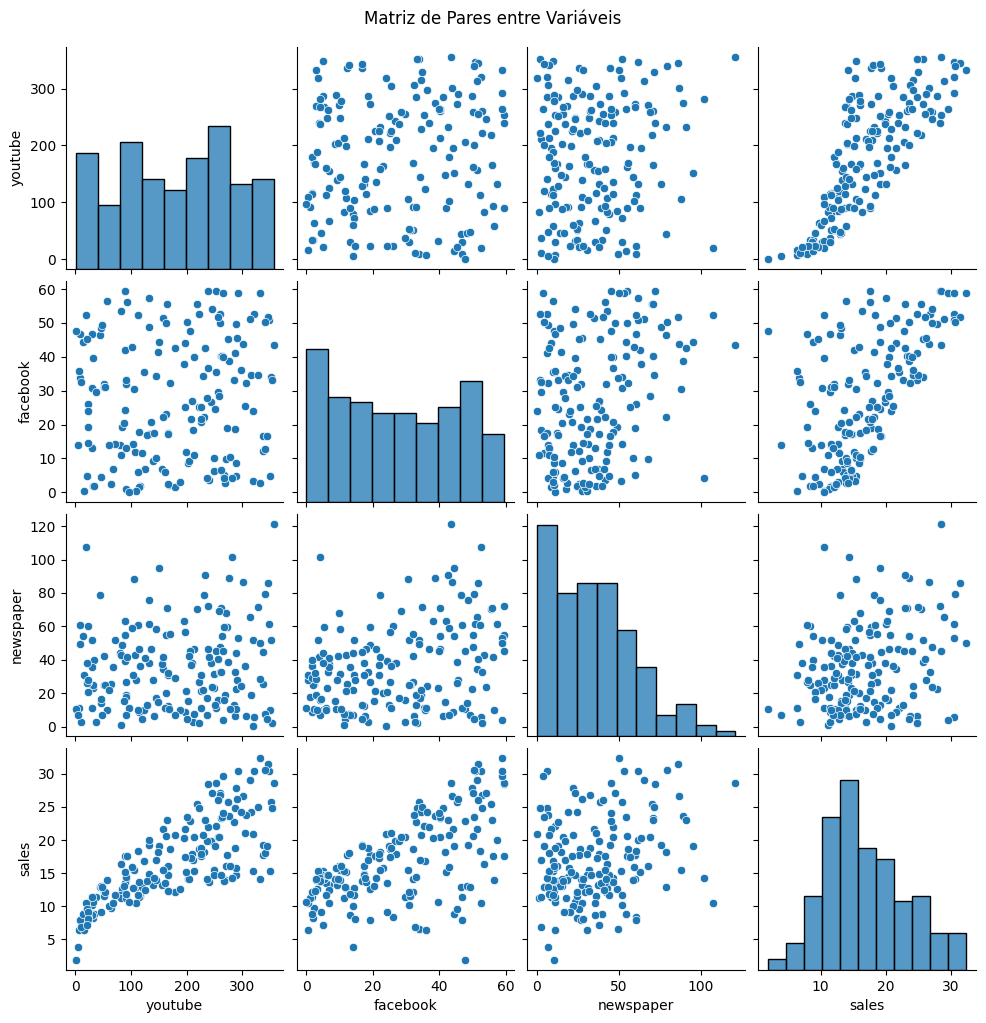

In [ ]:
#Relações entre variáveis
sns.pairplot(df)
plt.suptitle('Matriz de Pares entre Variáveis', y=1.02)
plt.show()

**Interpretação da Matriz de Pares entre Variáveis**

**Diagonais:**

Os gráficos ao longo da diagonal são histogramas de cada variável individualmente. Eles mostram a distribuição dos dados para cada variável sendo uma relação de sales com cada categoria.

**Fora da Diagonal:**

Os gráficos fora da diagonal são gráficos de dispersão que mostram a relação entre duas variáveis diferentes. Por exemplo:
A relação entre "youtube" e "sales" pode ser observada no gráfico na segunda linha, primeira coluna.
A relação entre "facebook" e "newspaper" está na terceira linha e quarta coluna.
Cada ponto em um gráfico de dispersão representa uma observação de duas variáveis.

**Correlação Linear Positiva:**

Algumas variáveis parecem ter uma correlação positiva clara. Por exemplo:
Entre "sales" e "investimento", a relação parece linear, indicando que à medida que o investimento aumenta, as vendas também tendem a aumentar.
O mesmo padrão de correlação positiva aparece entre "newspaper" e "investimento".

**Relações Não Lineares:**

Para algumas combinações de variáveis, como "ROI" e "investimento", há um padrão não linear onde os pontos formam uma curva. Isso indica que a relação entre essas variáveis pode ser mais complexa do que uma simples correlação linear.

**Ausência de Correlação ou Correlação Fraca:**

Algumas variáveis não apresentam uma correlação clara. Por exemplo, os gráficos de dispersão entre "youtube" e "facebook" mostram pontos espalhados de maneira mais aleatória, sugerindo pouca ou nenhuma correlação direta entre elas.


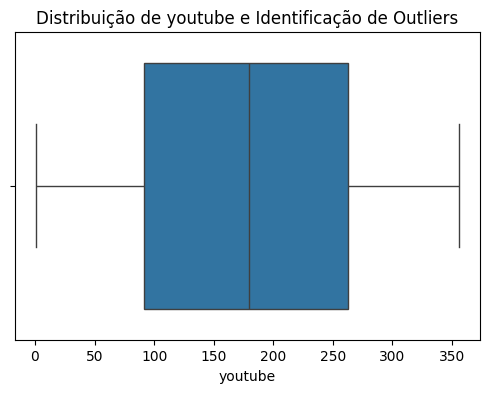

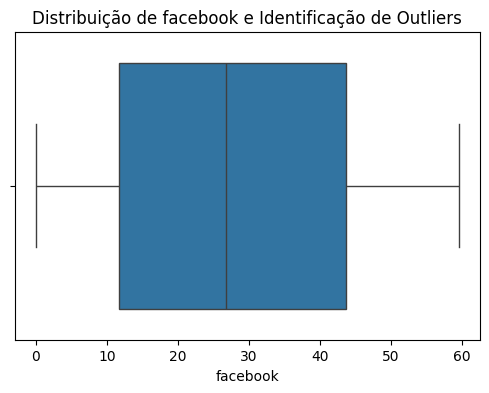

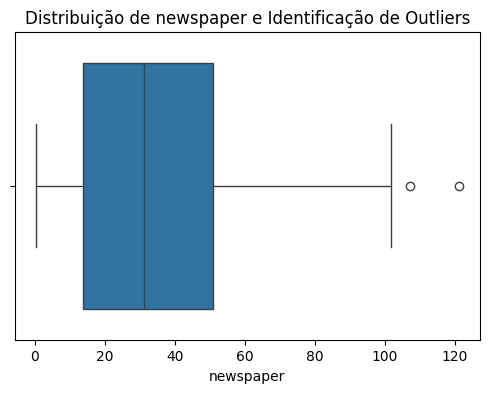

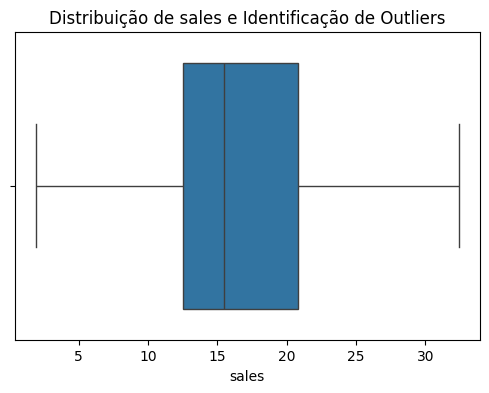

In [ ]:
#Gráfico de Outliers
for column in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[column])
    plt.title(f'Distribuição de {column} e Identificação de Outliers')
    plt.show()

**Interpretação dos gráficos de Outliers**

Outliers, representados pelas bolinhas, demonstram dados que têm comportamentos diferentes da maioria, representada pela caixa azul.

Diante dos gráficos acima, há dados fora do padão em Facebook e ROI.


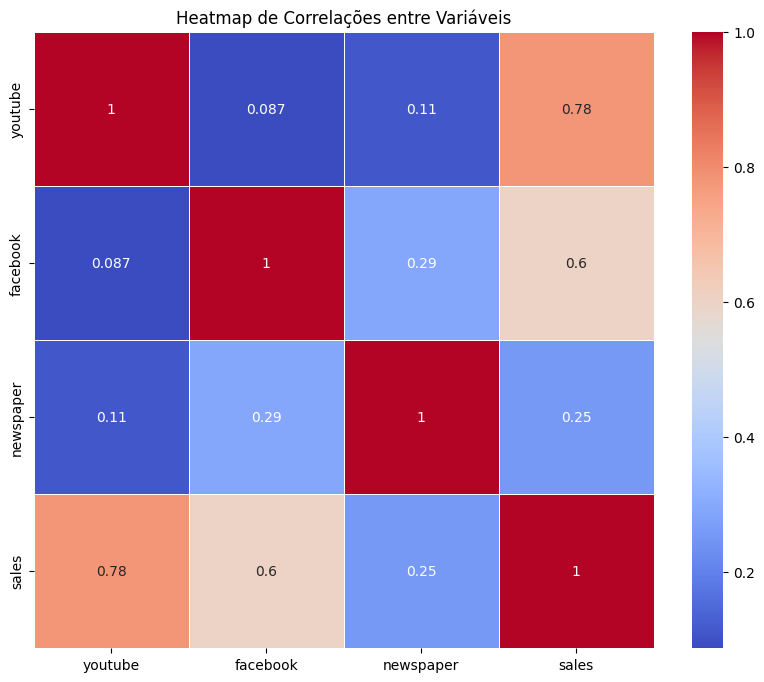

In [ ]:
#Heatmap de correlações entre variáveis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de Correlações entre Variáveis')
plt.show()

**Interpretação do Heatmap de correlações entre variáveis**

Sales: Tem uma forte correlação positiva com "investimento" e "newspaper". Isso sugere que, à medida que o investimento aumenta e mais se investe em ublicidade em jornais, as vendas também tendem a aumentar.

Youtube: Apresenta uma correlação positiva moderada com "sales", "investimento" e "facebook". Isso indica que o uso do YouTube como plataforma de publicidade pode influenciar positivamente as vendas, mas talvez não de forma tão forte quanto o investimento geral ou a publicidade em jornais.

Facebook: Apresenta uma forte correlação positiva com "investimento" e uma correlação moderada com "sales". Isso sugere que o Facebook também é uma plataforma eficaz para gerar vendas, mas talvez não tão eficaz quanto o investimento geral ou os jornais.

Newspaper: Como mencionado anteriormente, tem uma forte correlação positiva com "sales" e "investimento". Isso reforça a ideia de que a publicidade em jornais é um fator importante para aumentar as vendas.

Investimento: Apresenta fortes correlações positivas com quase todas as outras variáveis, indicando que o investimento geral em marketing tem um impacto significativo nas vendas.

ROI: Apresenta uma correlação negativa com "youtube" e "facebook". Isso pode indicar que, embora essas plataformas gerem vendas, o retorno sobre o investimento nelas pode ser menor do que em outras plataformas, como jornais.

## **Interpretação geral da Análise Exploratória:**

Diante do estudo de todos os gráficos acima, conclui-se que o impacto de investimento em youtube e facebook sobre as vendas é quase nulo. Quando comparado ao ROI, essas colunas mostram uma correlação decrescente, ou seja, quanto maior o investimento menor o retorno.

A melhor correlação encontrada é entre o investimento e newspaper, que mostra uma crescente em relação das vendas e do ROI.

Assim, o importante, em primeiro ponto, é em qual categoria investir, e em segundo ponto, quanto investir em cada categoria.



## **ETAPA 3 - MODELAGEM DOS DADOS**

In [ ]:
#Modelo simples de Regressão Linear

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
#Regressão de múltiplas variáveis
X = df[['youtube', 'facebook', 'newspaper']]
Y = df['sales']

In [ ]:
# Separando as variáveis de treino e teste.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size= 0.2, random_state= 42)

In [ ]:
# Instanciar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo com os dados de treino
model.fit(X_train, Y_train)

LinearRegression()

## **ETAPA 4 - CALCULANDO A PREDIÇÃO**

In [ ]:
# Prever os valores para o conjunto de teste
Y_pred = model.predict(X_test)

In [ ]:
# Avaliar o desempenho do modelo
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Erro quadrático médio (MSE): {mse:.2f}')
print(f'Coeficiente de determinação (R²): {r2:.2f}')

Erro quadrático médio (MSE): 4.90
Coeficiente de determinação (R²): 0.89


In [ ]:
#Verificando a acurácia
acuracia = r2_score(Y_test, Y_pred)
print(f'A acurácia deste modelo é de {round(acuracia*100)}%.')

A acurácia deste modelo é de 89%.


A acurácia alcançada foi de 89% utilizando 20% dos dados para treinamento.

## **Resultados**

Quanto aos critérios de negócios, foi concluído o entendimento das variáveis que demonstravam correlação com as vendas.

Quanto aos critérios do projeto, foram concluídos: (a) criação de uma análise exploratória que mostre a correlação entre os investimentos e o retorno; (b)criação de um modelo simples de regressão linear capaz de estimar o retorno de vendas que pode ser gerado a partir de um determinado investimento em publicidade.

**Processos seguidos para o desenvolvimento do projeto:**

1) Entendimento do negócio;

2) Entendimento dos dados;

3) Preparação dos dados;

4) Modelagem;

5) Treinamento e teste do modelo de regressão.